In [2]:
!pip3 install pip --upgrade pip

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 22.2.1
    Uninstalling pip-22.2.1:
      Successfully uninstalled pip-22.2.1


In [3]:
import os
import tarfile
import urllib

In [4]:
!pip3 install -U scikit-learn numpy scipy pandas matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [6]:
def fetch_housing_data(housing_url: str, housing_path: str) -> None:
    os.makedirs(housing_path, exist_ok=True)
    tgz_path: str = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

DOWNLOAD_ROOT: str = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH: str = os.path.join(os.getcwd(), 'datasets/housing')
HOUSING_URL: str = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH)

# try:
#     fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH)
# except Exception as e:
#     print(repr(e))

In [7]:
def load_housing_data(housing_path: str) -> None:
    csv_path: str = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

housing_data: pd.DataFrame = load_housing_data(HOUSING_PATH)

In [8]:
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [9]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
# Looking at the columns, we can see that <ocean_proximity> is a categorical variable. Let's look at the various values

print(housing_data['ocean_proximity'].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [11]:
housing_data.describe() # Provides 5-number summary

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
from pandas_profiling import ProfileReport

profile: ProfileReport = ProfileReport(housing_data, title="Profiling Report: California Housing Data", explorative=True)
# For extreme large reports, don't set <explorative=True>, but rather <minimal=True>
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

train, test = train_test_split(housing_data, test_size=0.2, random_state=42) # Here data is split, however it might be representative of the different <ocean_proximity> categories

<AxesSubplot:>

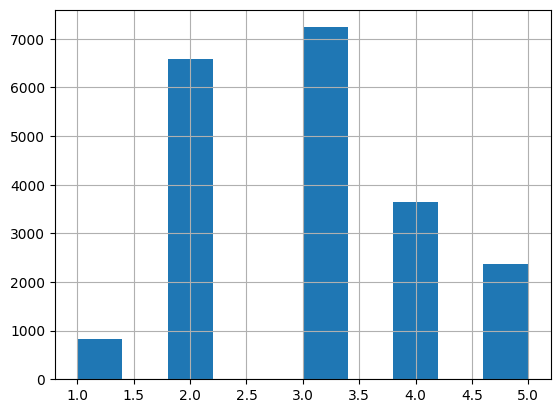

In [14]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"],
                                    bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf],
                                    labels=[1, 2, 3, 4, 5])

housing_data["income_cat"].hist()

In [15]:
split: StratifiedShuffleSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

print(strat_train_set["income_cat"].value_counts()/ len(strat_train_set))

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64


In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

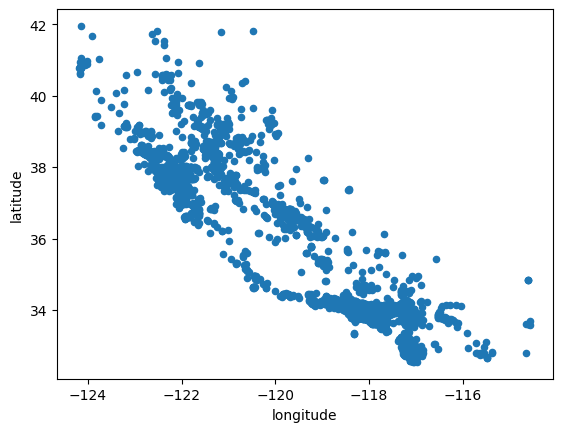

In [17]:
housing = strat_test_set.copy()

housing.plot(kind="scatter", x="longitude", y="latitude",)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

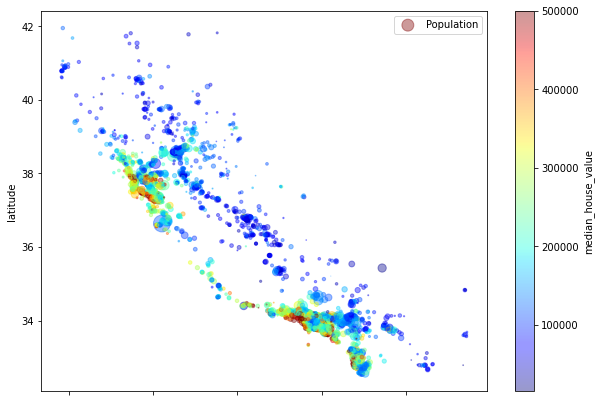

In [18]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib as plt

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                s=housing["population"]/100, label="Population", figsize=(10, 7),
                c="median_house_value", cmap=cm.get_cmap("jet"), colorbar=True,)
# plt.legend()

In [19]:
corr_matrix = housing.corr()
print(corr_matrix['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.691867
total_rooms           0.131296
housing_median_age    0.071210
households            0.070947
total_bedrooms        0.057247
population           -0.016164
longitude            -0.039848
latitude             -0.150336
Name: median_house_value, dtype: float64


array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

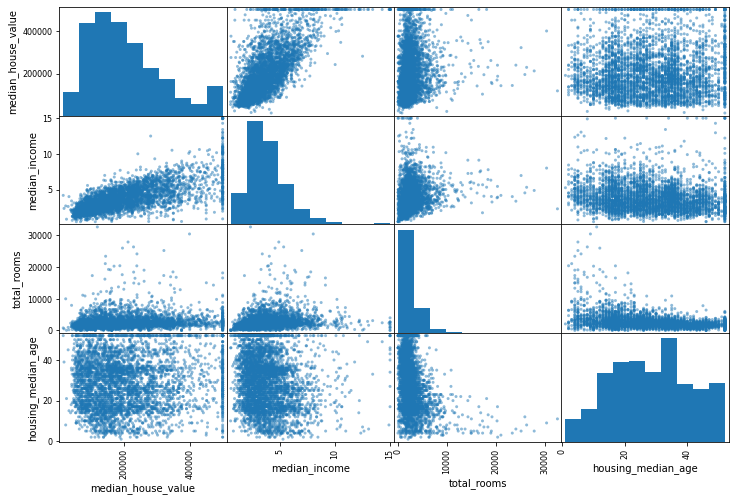

In [20]:
from typing import List
from attr import attr, attributes
from pandas.plotting import scatter_matrix

attribute: List = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attribute], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

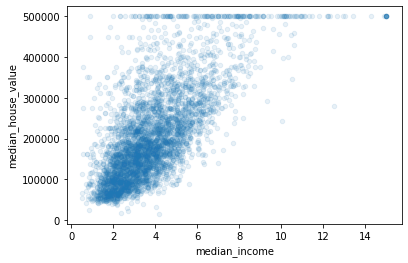

In [21]:
# Median Income and Median House Value are highly correlated, hence median income is a good predictor of median house value.

housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [22]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

corr_matrix1 = housing.corr()
print(corr_matrix1['median_house_value'].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.691867
rooms_per_household         0.192731
total_rooms                 0.131296
housing_median_age          0.071210
households                  0.070947
total_bedrooms              0.057247
population                 -0.016164
longitude                  -0.039848
population_per_household   -0.134999
latitude                   -0.150336
bedrooms_per_room          -0.240481
Name: median_house_value, dtype: float64


In [23]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [24]:
# Dealing with missing values

# housing.dropna(subset=['total_bedrooms'])
# housing.drop('total_bedrooms', axis=1)

median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True)

In [25]:
from sklearn.impute import SimpleImputer

imputer: SimpleImputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)

In [26]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

housing_cat = housing[['ocean_proximity']]
print(housing_cat.head(10))

      ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
1481         NEAR BAY
18125       <1H OCEAN
5830        <1H OCEAN
17989       <1H OCEAN
4861        <1H OCEAN


In [27]:
ordinal_encoder: OrdinalEncoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print(housing_cat_encoded[:10])

[[1.]
 [4.]
 [1.]
 [4.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [28]:
print(ordinal_encoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


ML Algorithms will assume that two nearby values are more similar than others. 
This might be good in some cases such as Average, Good, and Excellent, but it not the best choice for <ocean_proximity>

To fix this, one-hot encoding would be used. Each value would be equidistant from the other.

In [29]:
cat_encoder: OneHotEncoder = OneHotEncoder()
housing_cat_1encoder = cat_encoder.fit_transform(housing_cat)
housing_cat_1encoder = housing_cat_1encoder.toarray()
print(housing_cat_1encoder[:10])

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [30]:
print(cat_encoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [31]:
print(housing.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income ocean_proximity  
12655      2237.0       706.0         2.1736          INLAND  
15502      2015.0       768.0         6.3373      NEAR OCEAN  
2908        667.0       300.0         2.8750          INLAND  
14053       898.0       483.0         2.2264      NEAR OCEAN  
20496      1837.0       580.0         4.4964       <1H OCEAN  


In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room: bool = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X: pd.DataFrame, y: pd.DataFrame = None):
        return self
    
    def transform(self, X: pd.DataFrame):
        room_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, households_ix]
            return np.c_[X, room_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, room_per_household, population_per_household]

attr_adder: CombinedAttributesAdder= CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attributes = attr_adder.transform(housing.values)

    


In [33]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline: Pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [34]:
from sklearn.compose import ColumnTransformer

num_attribs: List = list(housing_num)
cat_attribs: List = ["ocean_proximity"]

full_pipeline: ColumnTransformer = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs )
])

housing_prepared: pd.DataFrame = full_pipeline.fit_transform(housing)

In [35]:
np.random.seed(42)

In [36]:
from sklearn.linear_model import LinearRegression

linear_regression: LinearRegression = LinearRegression()
linear_regression.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels[:5]

some_data_prepared = full_pipeline.transform(some_data)

print(f"Labels: {list(some_labels)}")
print(f"Predictions: {linear_regression.predict(some_data_prepared)}")


Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]
Predictions: [ 88256.36801237 304199.78068358 154086.24780718 183870.82699463
 247265.32060456]


In [37]:
from sklearn.metrics import mean_squared_error

housing_predictions = linear_regression.predict(housing_prepared)
lin_mse: float = mean_squared_error(housing_labels, housing_predictions)
lin_rmse: float = np.sqrt(lin_mse)

print(lin_rmse)

68911.09231096509


The models is underfitting the data. This can be attibuted to two causes:
1. Variables are not predictive enough
2. Model is too simplistic to fit the dataset

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_reg:DecisionTreeRegressor = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_prediction = tree_reg.predict(housing_prepared)
tree_mse: float = mean_squared_error(housing_labels, housing_prediction)
tree_rmse: float = np.sqrt(tree_mse)

print(tree_mse)

0.0


When the RMSE is too low to be true, this could be a sign of overfitting.
To test this hypothesis:
    1. Use your validation set. Split training set into two. One for training and the other for validation.
This would make you more confidence about your model

In [39]:
def display_scores(scores) -> None:
    print(f"Scores: {scores}")
    print(f"Mean: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

In [40]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_score: float = np.sqrt(-tree_scores)

display_scores(tree_rmse_score)

Scores: [72090.80957612 69614.09004889 70734.492667   73014.74182472
 66950.93369408 73558.20269405 74271.97159547 71385.45581161
 68957.04402429 73739.35657499]
Mean: 71431.70985112182
Standard Deviation: 2254.950411295175


In [41]:
lin_scores = cross_val_score(linear_regression, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_score: float = np.sqrt(-lin_scores)

display_scores(lin_rmse_score)

Scores: [72338.40387601 64530.64473729 68119.0474831  69120.53858892
 67148.70307804 73040.52281674 71766.52137855 69342.38602167
 66927.59027718 70505.4339031 ]
Mean: 69283.97921605909
Standard Deviation: 2553.222449927549


The Decision Tree Regressor is overfitting the dataset, more than the Linear Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

forest_reg: RandomForestRegressor = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_score: float = np.sqrt(-forest_scores)

display_scores(forest_rmse_score)

Scores: [51517.41992522 49733.39555455 47002.01408151 52510.57925052
 48001.23222743 51313.29674451 52939.47759431 50004.23005218
 48577.14165176 54205.38059392]
Mean: 50580.41676759011
Standard Deviation: 2199.2237686710682


In [43]:
from sklearn.model_selection import GridSearchCV

param_grid: List = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg: RandomForestRegressor = RandomForestRegressor()

grid_search: GridSearchCV = GridSearchCV(forest_reg, param_grid, cv=5,
                                            scoring='neg_mean_squared_error',
                                            return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [44]:
print(grid_search.best_estimator_)

RandomForestRegressor(max_features=6, n_estimators=30)


In [45]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63840.916805844645 {'max_features': 2, 'n_estimators': 3}
55740.11210110403 {'max_features': 2, 'n_estimators': 10}
52749.31197566139 {'max_features': 2, 'n_estimators': 30}
60044.22024340343 {'max_features': 4, 'n_estimators': 3}
52434.44631972966 {'max_features': 4, 'n_estimators': 10}
50297.421425582535 {'max_features': 4, 'n_estimators': 30}
59217.17302514148 {'max_features': 6, 'n_estimators': 3}
51942.17704335534 {'max_features': 6, 'n_estimators': 10}
49630.605731318305 {'max_features': 6, 'n_estimators': 30}
58775.0140921196 {'max_features': 8, 'n_estimators': 3}
51849.8339663111 {'max_features': 8, 'n_estimators': 10}
50158.04959442981 {'max_features': 8, 'n_estimators': 30}
62948.64760057519 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54055.482059550086 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59704.35379415836 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52913.30974392579 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [46]:
feature_importance = grid_search.best_estimator_.feature_importances_
print(feature_importance)

[8.37423194e-02 6.95872661e-02 4.11067991e-02 1.97580637e-02
 1.61721247e-02 1.76968769e-02 1.60817353e-02 3.34340956e-01
 8.45090633e-02 1.07065279e-01 2.28534590e-02 8.02115273e-03
 1.70837977e-01 8.49599144e-05 3.80086109e-03 4.34110652e-03]


In [47]:
extra_attribs: List = ["rooms_per_household", "pop_per_hhold", "bedrooms_per_hhold"]
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

vals = sorted(zip(feature_importance, attributes), reverse=True)
for val in vals:
    print(val)

(0.33434095619877185, 'median_income')
(0.17083797685748037, 'INLAND')
(0.1070652792298143, 'pop_per_hhold')
(0.08450906325889004, 'rooms_per_household')
(0.08374231938617877, 'longitude')
(0.06958726607328843, 'latitude')
(0.0411067990799671, 'housing_median_age')
(0.022853459002551806, 'bedrooms_per_hhold')
(0.019758063729562778, 'total_rooms')
(0.01769687691565148, 'population')
(0.016172124691111196, 'total_bedrooms')
(0.016081735324850976, 'households')
(0.00802115272723463, '<1H OCEAN')
(0.004341106519671656, 'NEAR OCEAN')
(0.0038008610905996545, 'NEAR BAY')
(8.495991437500406e-05, 'ISLAND')


In [48]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse: float = mean_squared_error(y_test, final_predictions)
final_rmse: float = np.sqrt(final_mse)

print(final_rmse)

47901.08753584607


In [49]:
from scipy import stats

confidence: float = 0.95
squared_errors = (final_predictions - y_test) ** 2

interval = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                loc=squared_errors.mean(),
                scale=stats.sem(squared_errors)))

print(interval)

[45909.64161084 49812.98205687]


In [50]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor

import warnings
warnings.filterwarnings("ignore")

seed: int = 42

models = {
    "ridge": Ridge(random_state=seed, max_iter=10000),
    "lasso": Lasso(random_state=seed),
    "elastic": ElasticNet(random_state=seed, max_iter=10000)
    # "sgd": SGDRegressor(random_state=seed),
}

params = {
    "ridge": [{"alpha": [0.02, 0.024, 0.025, 0.026, 0.03]}],
    "lasso": [{"alpha": [200, 230, 250,265, 270, 275, 290, 300, 500]}],
    "elastic": [{"max_iter": [1, 5, 10], "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], "l1_ratio": np.arange(0.0, 1.0, 0.1)}]
    # "sgd": [],
}

for key, value in models.items():
    models[key] = value.fit(housing_prepared, housing_labels)

    grid_search: GridSearchCV = GridSearchCV(models[key], params[key], cv=5,
                                            scoring='neg_mean_squared_error',
                                            return_train_score=True)

    grid_search.fit(housing_prepared, housing_labels)

    final_model = grid_search.best_estimator_

    X_test = strat_test_set.drop('median_house_value', axis=1)
    y_test = strat_test_set['median_house_value'].copy()

    X_test_prepared = full_pipeline.transform(X_test)

    final_predictions = final_model.predict(X_test_prepared)

    final_mse: float = mean_squared_error(y_test, final_predictions)
    final_rmse: float = np.sqrt(final_mse)

    print(final_rmse)

67323.25953669584
67473.14909039639
67565.12282895694


In [51]:
from sklearn.svm import SVR

svr = SVR()
# svr.fit(housing_prepared, housing_labels)

svr_scores = cross_val_score(svr, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
svr_rmse_score: float = np.sqrt(-svr_scores)

display_scores(svr_rmse_score)

Scores: [116732.0776887  120114.55559232 113933.42671783 120391.74091248
 114696.26536653 122784.8051087  119845.30142329 118280.41562334
 120244.90801742 118835.08501729]
Mean: 118585.8581467899
Standard Deviation: 2606.41303757853


In [56]:
param_grid: List = [
    {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1,1, 10, 100, 1000, 2000, 3000],
    'max_iter': [1, 5, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001]}
]

svr_reg: SVR = SVR()

grid_search: GridSearchCV = GridSearchCV(svr, param_grid, cv=5,
                                            scoring='neg_mean_squared_error',
                                            return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000, 2000, 3000],
                          'gamma': [1, 0.1, 0.01, 0.001],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                          'max_iter': [1, 5, 10, 100, 1000]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
print(grid_search.best_estimator_)

SVR(C=100, gamma=1, kernel='sigmoid', max_iter=1000)


In [54]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

126236.69716950333 {'C': 0.1, 'gamma': 1, 'kernel': 'linear', 'max_iter': 1}
126236.94049551558 {'C': 0.1, 'gamma': 1, 'kernel': 'linear', 'max_iter': 5}
126236.72416338109 {'C': 0.1, 'gamma': 1, 'kernel': 'linear', 'max_iter': 10}
126235.5410150036 {'C': 0.1, 'gamma': 1, 'kernel': 'linear', 'max_iter': 100}
116126.4028918113 {'C': 0.1, 'gamma': 1, 'kernel': 'linear', 'max_iter': 1000}
126236.67226399978 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 1}
126236.67429463453 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 5}
126564.51855328794 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 10}
132430.07315720353 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 100}
121119.58634137241 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 1000}
126242.66258859166 {'C': 0.1, 'gamma': 1, 'kernel': 'poly', 'max_iter': 1}
522841.79295682255 {'C': 0.1, 'gamma': 1, 'kernel': 'poly', 'max_iter': 5}
524144.0518064738 {'C': 0.1, 'gamma': 1, 'kernel': 'poly', 'max_iter': 10}
600829.956

In [55]:
from sklearn.model_selection import RandomizedSearchCV

svr: SVR = SVR()
random_search: RandomizedSearchCV = RandomizedSearchCV(svr, param_grid, random_state=42, scoring='neg_mean_squared_error')
search = random_search.fit(housing_prepared, housing_labels)

print(search.best_params_, search.best_estimator_, search.best_score_)



{'max_iter': 1000, 'kernel': 'linear', 'gamma': 0.001, 'C': 10} SVR(C=10, gamma=0.001, kernel='linear', max_iter=1000) 0.12852297493091025
